# Homework 1 (100 points)

This homework focuses on the pandas library and clustering. There are no python library restrictions for this homework. Suggested libraries are pandas, numpy, regex, and sklearn.

## Submission Instructions
**When completing your homework and preparing for the final submission on GitHub, it's important to ensure that you not only push the final .ipynb file but also create a PDF version of the notebook and include it in the repository. This PDF version serves as an essential backup and ensures that your work is easily accessible for grading. Once both the .ipynb and .pdf files are in the GitHub repository, be sure to add a link to the GitHub repository in Gradescope for assessment. `Please note that failing to submit the .pdf file as part of your assignment may result in point deductions, so it's crucial to follow these steps diligently to ensure a complete and successful submission.`**

## Exercise 1 (40 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines (except for `e` and `m`)

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

#### a) Write a function that reads in a filepath to a csv and returns the DataFrame. (1 point)

In [2]:
import pandas as pd
import numpy as np


df = pd.read_csv("train.csv")
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### b) Write a function that returns the number of rows that have at least one empty column value - (2 points)

In [3]:
def num_nans(df):
    sum = df.isnull().any(axis = 1).sum()
    return sum

print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

there are 708 rows with at least one empty value


#### c) Write a function that removes all columns with more than 200 NaN values - (2 points)

In [4]:
def drop_na(df):
    new_df = df.dropna(thresh = len(df)-200, axis = 1)
    return new_df

df = drop_na(df)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

#### d) Write a function that replaces `male` with 0 and `female` with 1 - (2 points)

In [8]:
def to_numerical(df):
    new_df = df['Sex'].replace({'male': 0, 'female': 1})
    return new_df

df['Sex'] = to_numerical(df)
df.head()

<ipython-input-8-11dd9fe73b1d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = to_numerical(df)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


#### e)  Transforming Names (9 points)

The dataset contains a column called `Name` which consists of names in the following format: "Last Name, Title. First Name Middle Name" (e.g., "Braund, Mr. Owen Harris"). In this question, you will write a Python function to extract and separate various components of the `Name` into four new columns: `First Name`, `Middle Name`, `Last Name`, and `Title`.

Write a Python function named `extract_names(df)` to accomplish this task. The function should take `df` as input and should return the four new columns.

For example, if the original `Name` column contains "Braund, Mr. Owen Harris", the resulting four columns should look like this:

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [5]:
def extract_names(df):
    full_name = df['Name'].str.split(',', expand = True)
    df['Last Name'] = full_name[0].str.strip()
    extra_chars = full_name[1].str.split('.', expand = True)
    df['Title'] = extra_chars[0].str.strip()
    full_name = extra_chars[1].str.split(' ', expand = True)
    df['First Name'] = full_name[1].str.strip()
    df['Middle Name'] = full_name[2].str.strip()
    return df[['First Name', 'Middle Name', 'Last Name', 'Title']]

df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Last Name,Title,First Name,Middle Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr,Owen,Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs,John,Bradley
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Laina,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Futrelle,Mrs,Jacques,Heath
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Allen,Mr,William,Henry


#### f) Write a function that replaces all missing ages with the average age - (2 points)

In [7]:
def replace_with_mean(df):
    return df['Age'].fillna(df['Age'].mean())

df['Age'] = replace_with_mean(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Last Name,Title,First Name,Middle Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr,Owen,Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs,John,Bradley
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Laina,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Futrelle,Mrs,Jacques,Heath
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Allen,Mr,William,Henry


`The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.`

#### g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (1 point)

<BarContainer object of 2 artists>

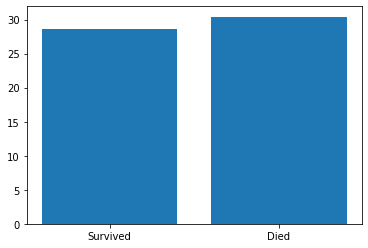

In [11]:
import matplotlib.pyplot as plt

survived = df[df['Survived'] == 1]['Age'].mean()
died = df[df['Survived'] == 0]['Age'].mean()


plt.bar(['Survived', 'Died'], [survived, died])


Almost a 50-50 ratio, in regards to the people who died and lived from the events on the Titanic.

#### h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (1 point)

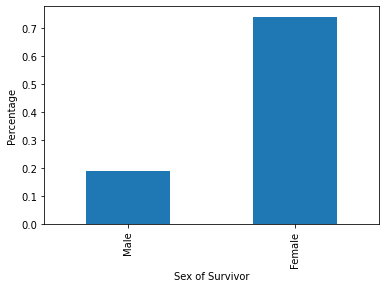

In [14]:
# your code here
survived_sex = df.groupby('Sex')['Survived'].mean()

# plotting bar graph
survived_sex.plot(kind = 'bar')
plt.xlabel('Sex of Survivor')
plt.ylabel('Percentage')
plt.xticks([0,1], ['Male', 'Female'])
plt.show()

More women survived than men. It is likely possible for men to save women first, so that may be why the data is skewed. 

#### i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (2 points)

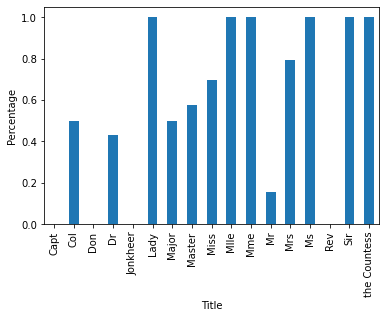

In [20]:
# your code here
survived_title = df.groupby('Title')['Survived'].mean()

# plotting bar graph
survived_title.plot(kind = 'bar')
plt.xlabel('Title')
plt.ylabel('Percentage')
plt.show()

The captain unfortunately passed away with his ship. It also looks like many of the "women" titles were able to survive which is on point with the data in the graph from question h.

#### j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (2 points)

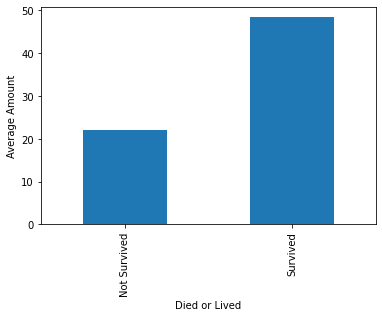

In [21]:
# your code here
survived_fare = df.groupby('Survived')['Fare'].mean()

# plotting bar graph
survived_fare.plot(kind = 'bar')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.xlabel('Died or Lived')
plt.ylabel('Average Amount')
plt.show()


The people who died, on average, paid a lower fare than those who lived. The people who lived were probably from a background of higher status than most.

#### k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (2 points)

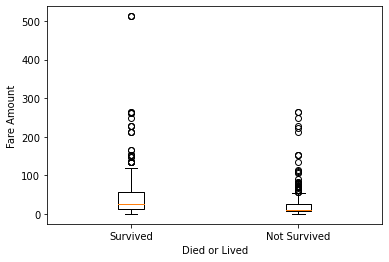

In [25]:
# your code here

survived_fareAmount = df[df['Survived'] == 1]['Fare'].values
not_survived_fareAmount = df[df['Survived'] == 0]['Fare'].values

# plotting bar graph
plt.boxplot([survived_fareAmount, not_survived_fareAmount], labels = ['Survived', 'Not Survived'])
plt.xlabel('Died or Lived')
plt.ylabel('Fare Amount')
plt.show()

It looks like one of the surivors paid around 500 for a fare. We can also see that ones who did not survive were in the range of people who paid less.

#### l) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2 points)

In [26]:
# your code here
def problem_l(df):
    actual_fare = (df['Fare'] - df['Fare'].mean()) / df['Fare'].std()
    return actual_fare
df['Fare'] = problem_l(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Last Name,Title,First Name,Middle Name
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,-0.502163,S,Braund,Mr,Owen,Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,0.786404,C,Cumings,Mrs,John,Bradley
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,-0.488580,S,Heikkinen,Miss,Laina,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,0.420494,S,Futrelle,Mrs,Jacques,Heath
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,-0.486064,S,Allen,Mr,William,Henry


#### m) Remove all non-numerical columns from the dataframe. - (2 points)

In [27]:
new_df = df._get_numeric_data()
new_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,-0.502163
1,2,1,1,1,38.0,1,0,0.786404
2,3,1,3,1,26.0,0,0,-0.488580
3,4,1,1,1,35.0,1,0,0.420494
4,5,0,3,0,35.0,0,0,-0.486064


#### n) Your task is to write a Python function, `N_most_similar_pairs(df, N)` (10pts)


Please use the dataset created from applying all the above transformations / modifications. This function calculates and returns the names of the N most similar pairs of passengers based on Euclidean distance. Additionally, you should ignore pairs that have a distance of zero.
Here's a step-by-step breakdown of the task:
1. Remove all non-numerical columns from the dataset (including Passenger ID), as we're only interested in numerical attributes for calculating similarity.
2. Calculate the Euclidean distance between each pair of passengers based on their numerical attributes. You can use python's any built-in function for this step.
3. Ignore pairs of passengers that have a distance of zero (meaning they are identical).
4. Find the N most similar pairs of passengers based on their Euclidean distances. These pairs should have the smallest distances.

In [34]:
from sklearn.metrics.pairwise import euclidean_distances


def N_most_similar_pairs(df, N):
    # Clears df for just number values
    num_df = df.select_dtypes(include = ['int64','float64'])
    
    # Calculate the euclidean distances for pairs
    dist = euclidean_distances(num_df)
    dist[dist == 0] = float('inf')
    
    # Finds most similar pairs 
    index = dist.argsort(axis = None)[:N]
    pairings = [(i // dist.shape[0], i % dist.shape[0]) for i in index]
    names = [(df.iloc[pair[0]]['Name'], df.iloc[pair[1]]['Name']) for pair in pairings]
    return names

print("The 3 most similar pairs of passengers are: " + str(N_most_similar_pairs(df, 3)))

The 3 most similar pairs of passengers are: [('Mockler, Miss. Helen Mary "Ellie"', 'McGovern, Miss. Mary'), ('Ivanoff, Mr. Kanio', 'Nankoff, Mr. Minko'), ('Troupiansky, Mr. Moses Aaron', 'Berriman, Mr. William John')]


## Exercise 2 (40 points)

This exercise will use the `fetch_olivetti_faces` dataset and challenge your understanding of clustering and K-means.

#### a) Using K-means, cluster the facial images into 10 clusters and plot the centroid of each cluster. 

Hint: The centroid of each cluster has the same dimensions as the facial images in the dataset. - (10 points)

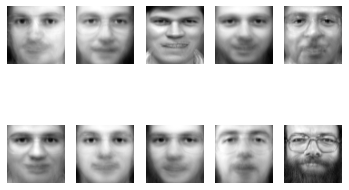

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import fetch_olivetti_faces

face = fetch_olivetti_faces(shuffle = True, random_state = 15)
face_data = face.data

# your code here
kmeans = KMeans(n_clusters=10).fit(face_data)
centroids = kmeans.cluster_centers_
predicted_clusters = kmeans.predict(face_data)

for i,c in enumerate(centroids):
    plt.subplot(2, 5, i+1)
    plt.imshow(c.reshape((64, 64)), cmap='gray')  # Adjust the dimensions as per the dataset
    plt.axis('off')
plt.show()
    

#### b) Silhouette Scores
Now, let's compare the quality of the clustering obtained through K-means in part `a` with a different clustering generated from the labels attached to each image. Each image in the dataset is associated with a label corresponding to the person's identity. As a result, these labels can naturally generate a clustering where all images of the same person belong to the same cluster (e.g., all images of person A are in cluster A).

Your task is to calculate the silhouette score for the clustering obtained through K-means in part `a` and the clustering generated from the labels attached to each image.
Explain the results and differences in silhouette scores between the two clustering approaches.  - (10 points)

In [10]:
from sklearn.metrics import silhouette_score

silhouette_score_kmeans = silhouette_score(face_data, predicted_clusters)
silhouette_score_labels = silhouette_score(face_data, face.target)

print("kmeans silhouette score:",silhouette_score_kmeans)
print("actual silhouette score:",silhouette_score_labels)

kmeans silhouette score: 0.08931738
actual silhouette score: 0.10557365


The kmeans and the actual silhouette scores are not too different. I think that the two ways of clustering are similar. 

#### c) Plot a random image from the `fetch_olivetti_faces` dataset. - (5 points)

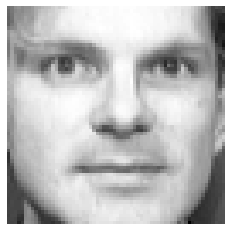

In [11]:
ran_index = np.random.randint(0, face_data.shape[0])
ran_face = face_data[ran_index].reshape(64, 64)

plt.figure(figsize=(4, 4))
plt.imshow(ran_face, cmap='gray')
plt.axis('off')
plt.show()

#### d) By applying K-Means clustering to this dataset, we are clustering for similar facial patterns and features. The centroid of each cluster will represent a facial pattern. You can then replace every pixel in the original image with the centroid of the cluster it was assigned to, thus only using K facial patterns to recreate the image. Using the same image as in c), produce an image that only uses 3 facial patterns (the 3 centroids of the clusters obtained by clustering the image itself using K-Means). - (10 points)

For example, if the left side is your original image, the transfomed image with 3 centroids should look like the right side

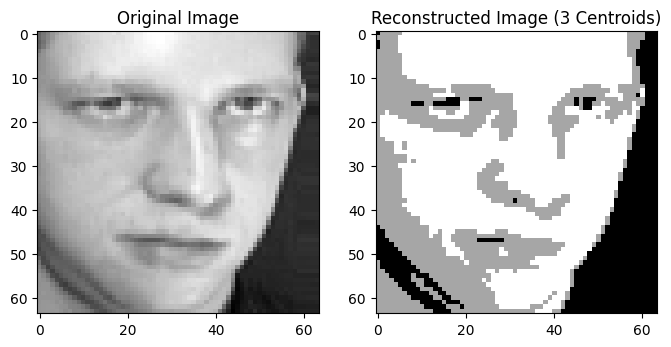

In [3]:
from IPython.display import Image
Image(filename="Example.png", width=600, height=600)

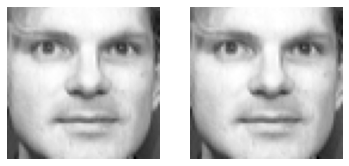

In [22]:
clusters = 3
kmeans = KMeans(n_clusters = clusters, random_state = 17)
ran_face_flattened = ran_face.reshape(-1, 1)
kmeans.fit(ran_face_flattened)

pixel_face = kmeans.cluster_centers_[kmeans.predict(ran_face_flattened)].reshape(64, 64)

plt.subplot(1,2,1)
plt.imshow(ran_face, cmap = 'gray')
plt.axis('off')

# creating image with 3 clusters
plt.subplot(1,2,2)
plt.imshow(pixel_face, cmap = 'gray')
plt.axis('off')

plt.show()

#### e) From the code above, write a function that can handle any number of chosen colors. Demonstrate it working on the same picture using 2 colors and 10 colors. - (5pts)

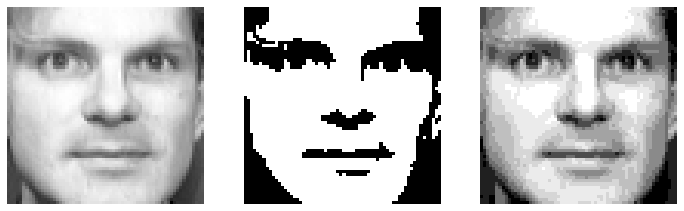

In [23]:
def kmeans_colors(img, num_colors):
    img_flattened = img.reshape(-1, 1)
    kmeans = KMeans(n_clusters = num_colors, random_state = 17)
    kmeans.fit(img_flattened)
    pixel_face = kmeans.cluster_centers_[kmeans.predict(img_flattened)].reshape(img.shape)

    return pixel_face

# creates original image
plt.figure(figsize = (12, 4))
plt.subplot(1, 3, 1)
plt.imshow(ran_face, cmap = 'gray')
plt.axis('off')

# creates image with 2 clusters
image_with_2_colors = kmeans_colors(ran_face, num_colors = 2)
plt.subplot(1, 3, 2)
plt.imshow(image_with_2_colors, cmap = 'gray')
plt.axis('off')

# creates image with 10 clusters
image_with_10_colors = kmeans_colors(ran_face, num_colors = 10)
plt.subplot(1, 3, 3)
plt.imshow(image_with_10_colors, cmap = 'gray')
plt.axis('off')

plt.show()

## Exercise 3 (20pts)

Using the kmeans code from class:

1. Create a 3D dataset. The dataset should be generated randomly (you can pick the variance / covariance) around the following centers: `[[0, 0, 0], [4, 4, 4], [-4, -4, 0], [-4, 0, 0]]` (5pts)
2. Modify the code from class to snapshot 3D images. (15pts) Make sure you:  
    a. use a `view_init` where the clusters and centers can easily be seen  
    b. set the appropriate `xlim`, `ylim` and `zlim` so that the plot doesn't change size

Please display your animation in the notebook (and pdf) in addition to adding it as a file to your repo.

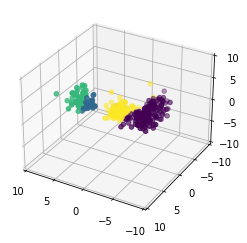

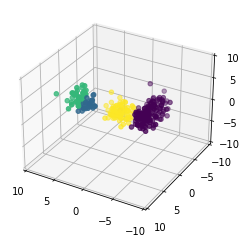

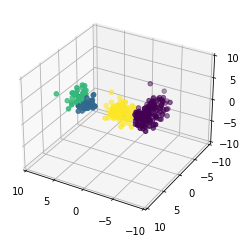

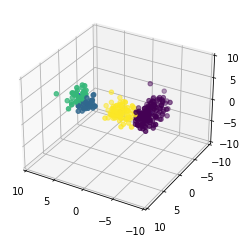

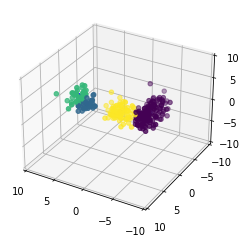

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn.datasets as datasets
from PIL import Image as im

centers = [[0, 0, 0], [4, 4, 4], [-4, -4, 0], [-4, 0, 0]]
X, Y = datasets.make_blobs(n_samples = 300, centers = centers, cluster_std = 1, random_state = 100)

class KMeans():

    def __init__(self, data, k):
        self.data = data
        self.k = k
        self.assignment = [-1 for Y in range(len(data))]
        self.snaps = []

    def snap(self, centers):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection = '3d')
        ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = self.assignment)
        ax.scatter(centers[:,0], centers[:, 1], centers[:, 2], c = 'b')
        ax.view_init(elev=30, azim=120)
        ax.set_xlim([-10, 10])
        ax.set_ylim([-10, 10])
        ax.set_zlim([-10, 10])
        fig.canvas.draw()
        self.snaps.append(im.fromarray(np.asarray(fig.canvas.renderer.buffer_rgba())))

    def initialize(self):
        return self.data[np.random.choice(range(len(self.data)),self.k, replace = False)]

    def distance(self,x,y):
        return  np.linalg.norm(x-y)

    def assign(self, centers):
        for i in range(len(self.data)):
            delta = [float('inf'),0]
            for j in range(len(centers)):
                distance = self.distance(centers[j],self.data[i])
                if distance < delta[0]:
                    delta[0] = distance
                    delta[1] = j
            self.assignment[i] = delta[1]

    def get_centers(self):
        centers = []
        for i in set(self.assignment):
            cluster = []
            for j in range(len(self.data)):
                if self.assignment[j] == i:
                    cluster.append(self.data[j])
            x = 0
            y = 0
            z = 0
            for delta in range(len(cluster)):
                x+=cluster[delta][0]
                y+=cluster[delta][1]
                z+=cluster[delta][2]
            centers.append([x/len(cluster), y/len(cluster), z/len(cluster)])
        return np.array(centers)

    def is_diff_centers(self,centers, new_centers):
        n = len(centers)
        flag = 0
        for i in range(n):
            if centers[i][0]!=new_centers[i][0]:
                flag = 1
        if flag ==1:
            return True
        return False

    def lloyds(self):
        centers = self.initialize()
        self.assign(centers)
        self.snap(centers)
        new_centers = self.get_centers()
        while self.is_diff_centers(centers,new_centers):
            self.assign(new_centers)
            centers = new_centers
            self.snap(centers)
            new_centers = self.get_centers()
        return

kmeans = KMeans(X, 4)
kmeans.lloyds()
images = kmeans.snaps

images[0].save(
    'kmeans.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)